In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df3 = pd.read_csv('screen_time.csv')   
df3.head()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500


In [3]:
rows, cols = df3.shape
print(f'El dataset tiene {rows} filas y {cols} columnas.')

El dataset tiene 198 filas y 6 columnas.


In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          198 non-null    int64  
 1   Gender                       198 non-null    object 
 2   Screen Time Type             198 non-null    object 
 3   Day Type                     198 non-null    object 
 4   Average Screen Time (hours)  198 non-null    float64
 5   Sample Size                  198 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.4+ KB


In [5]:
df3.describe()

,Age,Average Screen Time (hours),Sample Size
count,198.000000,198.000000,198.000000
mean,10.000000,2.993030,400.000000
std,3.170294,1.922822,63.405872
min,5.000000,0.440000,300.000000
25%,7.000000,1.402500,340.000000
50%,10.000000,2.490000,400.000000
75%,13.000000,4.397500,460.000000
max,15.000000,8.190000,500.000000


In [6]:
df3.isnull().sum()

Age                            0
Gender                         0
Screen Time Type               0
Day Type                       0
Average Screen Time (hours)    0
Sample Size                    0
dtype: int64

In [7]:
df3["Screen Time Type"].value_counts()

Screen Time Type
Educational     66
Recreational    66
Total           66
Name: count, dtype: int64

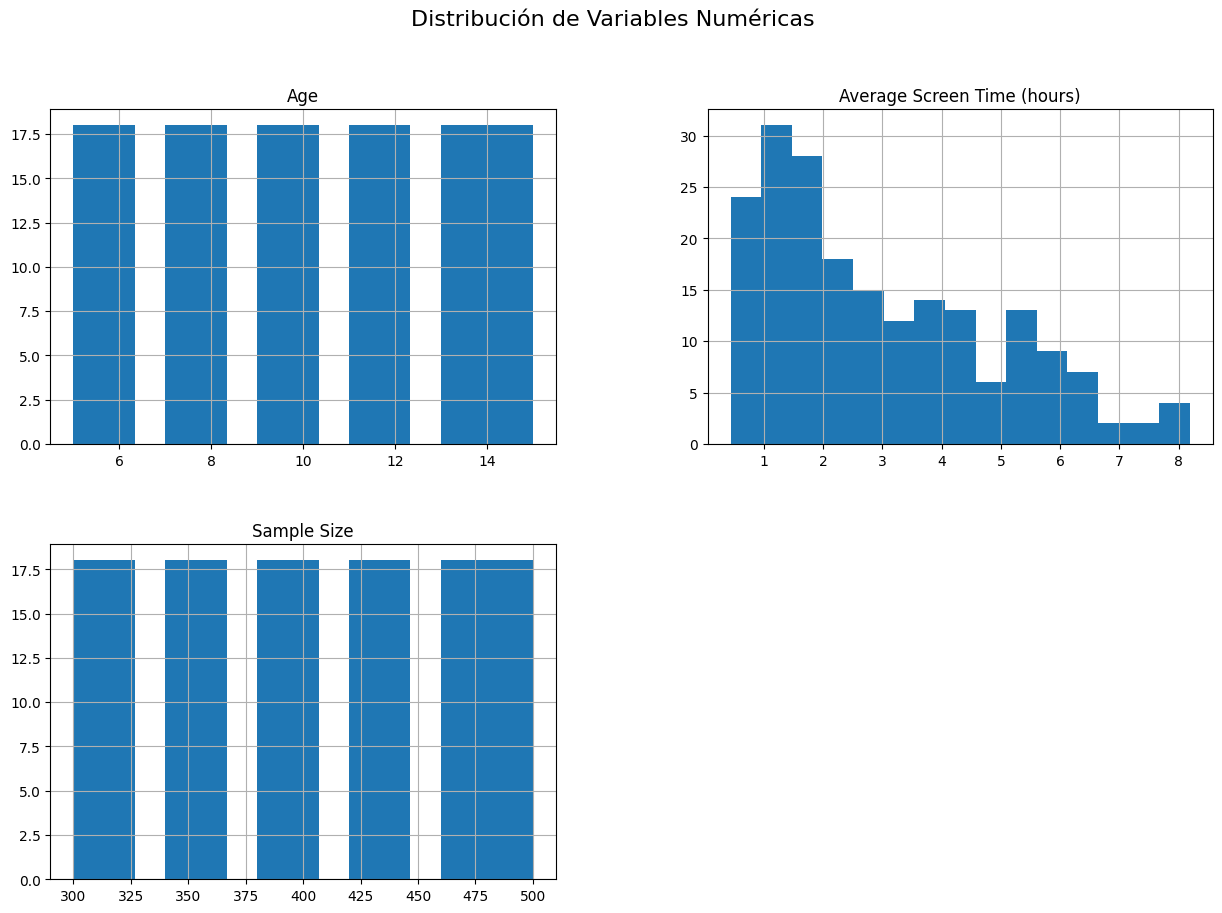

In [8]:
#Distribución de las variables numéricas
num_cols = df3.select_dtypes(include=['int64', 'float64']).columns
df3[num_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.show()

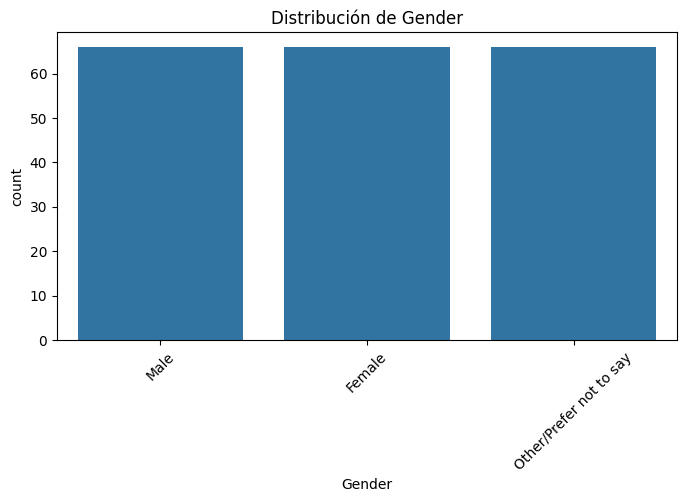

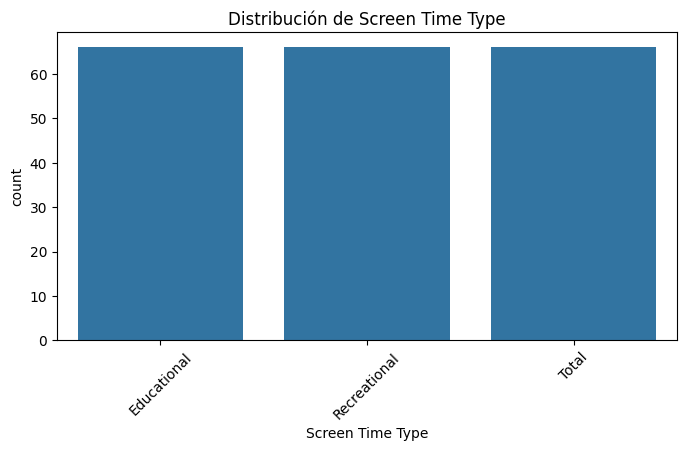

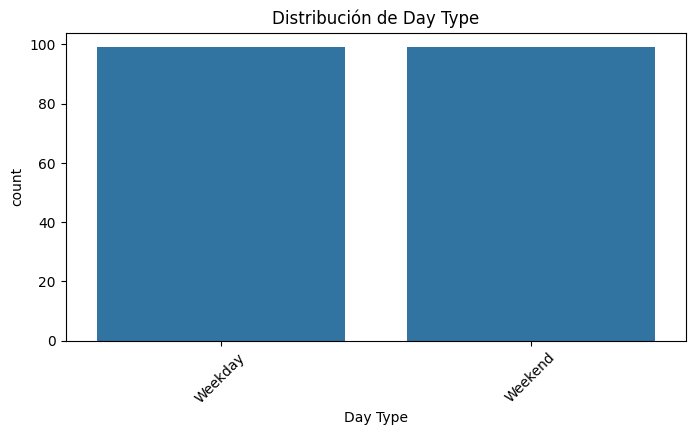

In [9]:
#Visualización de las variables categóricas
cat_cols = df3.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df3, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

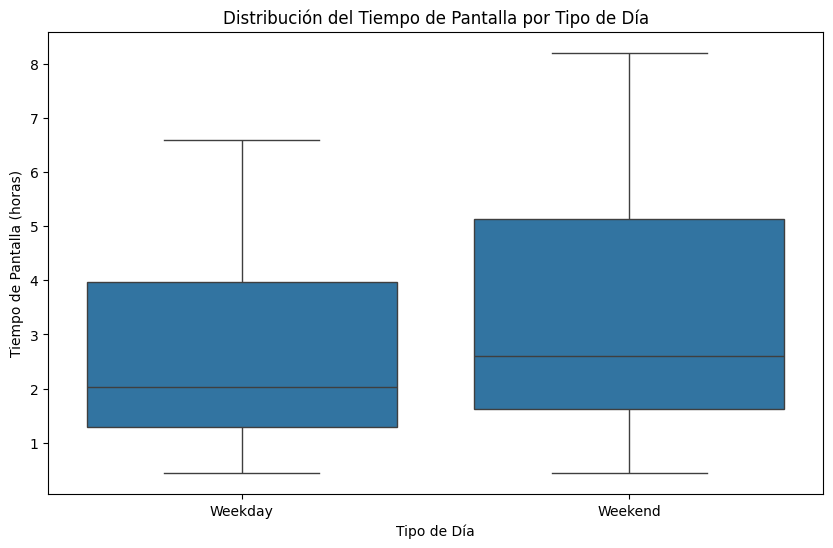

In [10]:
# Distribución del tiempo de pantalla por tipo de día
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3, x='Day Type', y='Average Screen Time (hours)')
plt.title('Distribución del Tiempo de Pantalla por Tipo de Día')
plt.xlabel('Tipo de Día')
plt.ylabel('Tiempo de Pantalla (horas)')
plt.show()


IED - INDICE DE EQUILIBRIO DIGITAL
(El IED mide si el uso de pantallas:
está equilibrado,
tiene propósito(educativo),
no domina el tiempo del niño.)

Interpretación del IED

IED alto → uso equilibrado y con propósito

IED bajo → sobreexposición o uso no regulado



In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Copia de seguridad
df_screen = df3.copy()

# Crear la columna 'Age_Group' basada en la columna 'Age'
df_screen["Age_Group"] = df_screen["Age"].apply(
    lambda x: "Child" if x < 12 else "Adolescent"
)

# Agregar uso de pantallas por grupo de edad y tipo de pantalla
df_grouped = (
    df_screen
    .groupby(["Age_Group", "Screen Time Type"])["Average Screen Time (hours)"]
    .mean()
    .reset_index()
)

#pivotar en formato ancho
df_pivot = df_grouped.pivot(
    index="Age_Group",
    columns="Screen Time Type",
    values="Average Screen Time (hours)"
).reset_index()

df_pivot.columns.name = None

# Normalizar los datosscaler = MinMaxScaler()

screen_cols = ["Educational", "Recreational", "Total"]
df_pivot[screen_cols] = scaler.fit_transform(df_pivot[screen_cols])


In [ ]:
# Calcular el Índice de Equilibrio Digital (IED)

df_pivot["IED"] = (
    0.45 * df_pivot["Educational"] +
    0.35 * (1 - df_pivot["Total"]) +
    0.20 * (1 - df_pivot["Recreational"])
)


In [ ]:
#exportar el ied para usarlo en el otro notebook


df_ied = df_pivot[["Age_Group", "IED"]]

df_ied.to_csv("ied_by_age_group.csv", index=False)
df_ied

,Age_Group,IED
0,Adolescent,0.45
1,Child,0.55


/var/folders/m6/9v0_yl357zx85v4fgqtpsfj00000gn/T/ipykernel_957/3922715746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ied, x='Age_Group', y='IED', palette='viridis')


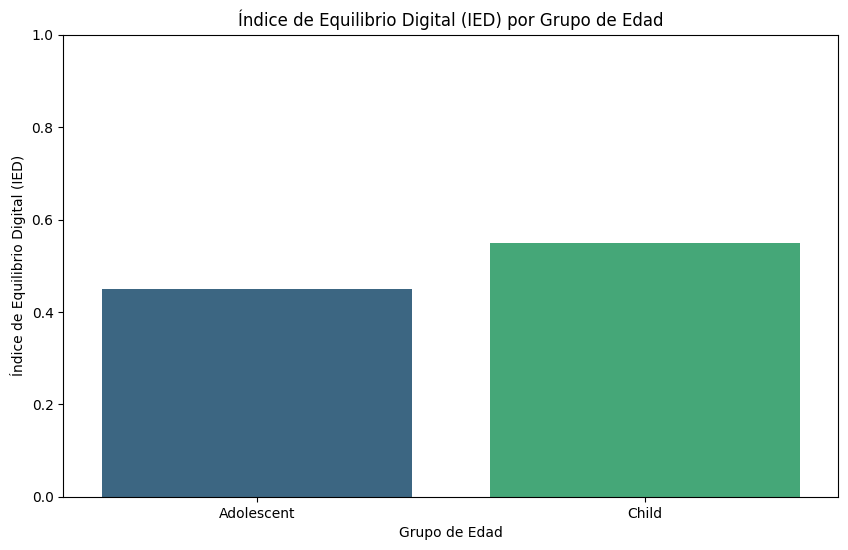

In [33]:
# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ied, x='Age_Group', y='IED', palette='viridis')
plt.title('Índice de Equilibrio Digital (IED) por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Índice de Equilibrio Digital (IED)')
plt.ylim(0, 1)
plt.show()